In [586]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyod

lien du ds: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [587]:
dff = pd.read_csv(r"C:\Users\Global Tech\Downloads\bengaluru_house_prices.csv")
dff.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# EDA

In [588]:
dff.shape

(13320, 9)

In [589]:
dff.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [590]:
dff.describe()##

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [591]:
dff.duplicated().sum()

529

In [592]:
df = dff.copy()

In [593]:
df["is_duplicate"] = df.duplicated(keep=False)
df_sorted = df[df["is_duplicate"]].sort_values(by=list(df.columns))  
df_sorted.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,is_duplicate
3648,Built-up Area,18-Aug,Electronic City Phase II,2 BHK,Sryalan,1000,2.0,1.0,28.88,True
8875,Built-up Area,18-Aug,Electronic City Phase II,2 BHK,Sryalan,1000,2.0,1.0,28.88,True
2049,Built-up Area,18-Dec,Electronic City,2 BHK,NaN,1025,2.0,1.0,29.60,True
10876,Built-up Area,18-Dec,Electronic City,2 BHK,NaN,1025,2.0,1.0,29.60,True
5801,Built-up Area,18-Dec,Electronic City,2 BHK,NaN,1065,2.0,1.0,30.75,True


In [594]:
# we chose not to remove duplicates because there are no ids to rooms so we are assuming there might be units to the same building for exaple

In [595]:
#converti le sqft
def convert_sqft_to_float(sqft):
    try:
        if '-' in str(sqft):  # "1200-1400"
            sqft_values = sqft.split('-')
            return (float(sqft_values[0]) + float(sqft_values[1])) / 2  # Take average
        return float(sqft)
    except:
        return np.nan  # Return NaN if conversion fails

# Apply conversion function
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_float)

# Convert sqft to square meters
df['total_sqmt'] = df['total_sqft'] * 0.092903

In [596]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,is_duplicate,total_sqmt
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,False,98.105568
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,False,241.547800
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,False,133.780320
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,False,141.305463
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,False,111.483600


In [597]:
# Calculate percentage of missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Display in descending order
missing_percentages = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
print(missing_percentages)


society       41.306306
balcony        4.572072
bath           0.548048
total_sqft     0.345345
total_sqmt     0.345345
size           0.120120
location       0.007508
dtype: float64


In [598]:
df.shape

(13320, 11)

### visualizer les valeurs numeriques

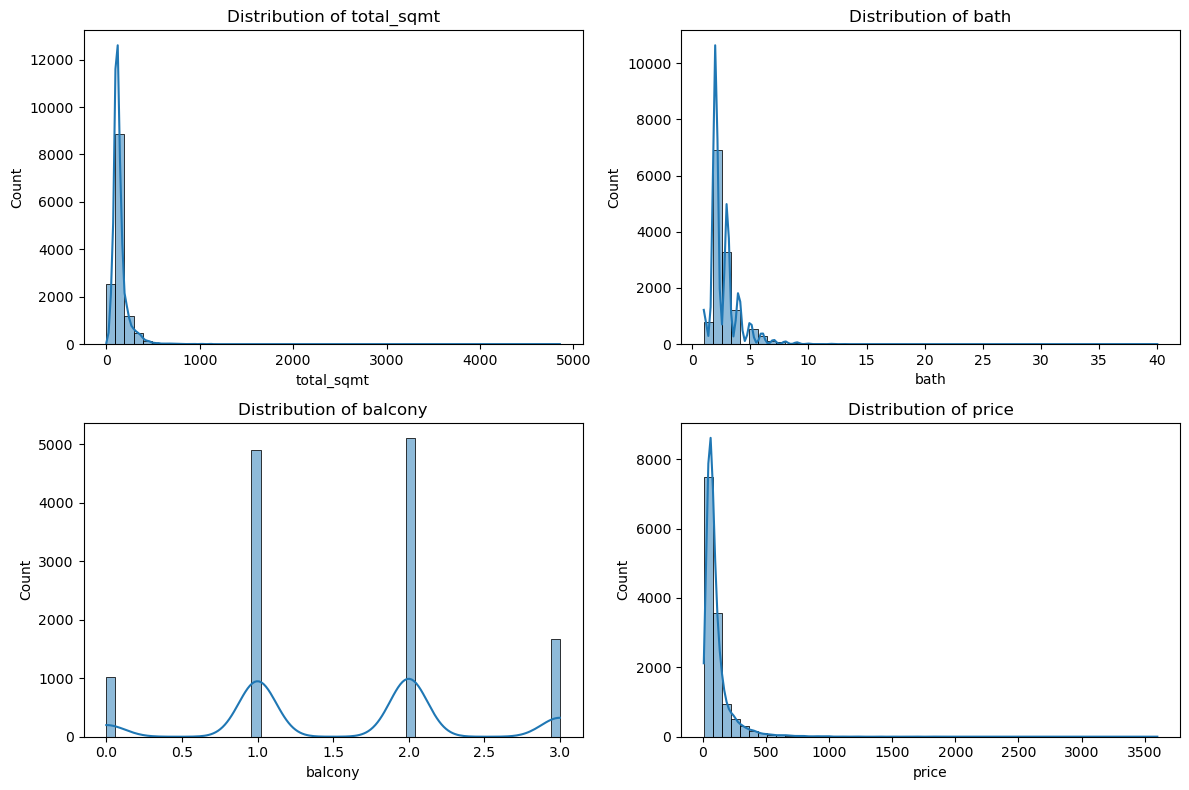

In [599]:
# List of numerical features (Updated with total_sqmt)
num_features = ['total_sqmt', 'bath', 'balcony', 'price']

# Create histograms for numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature].dropna(), bins=50, kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

### visualizer les valeurs categoriel

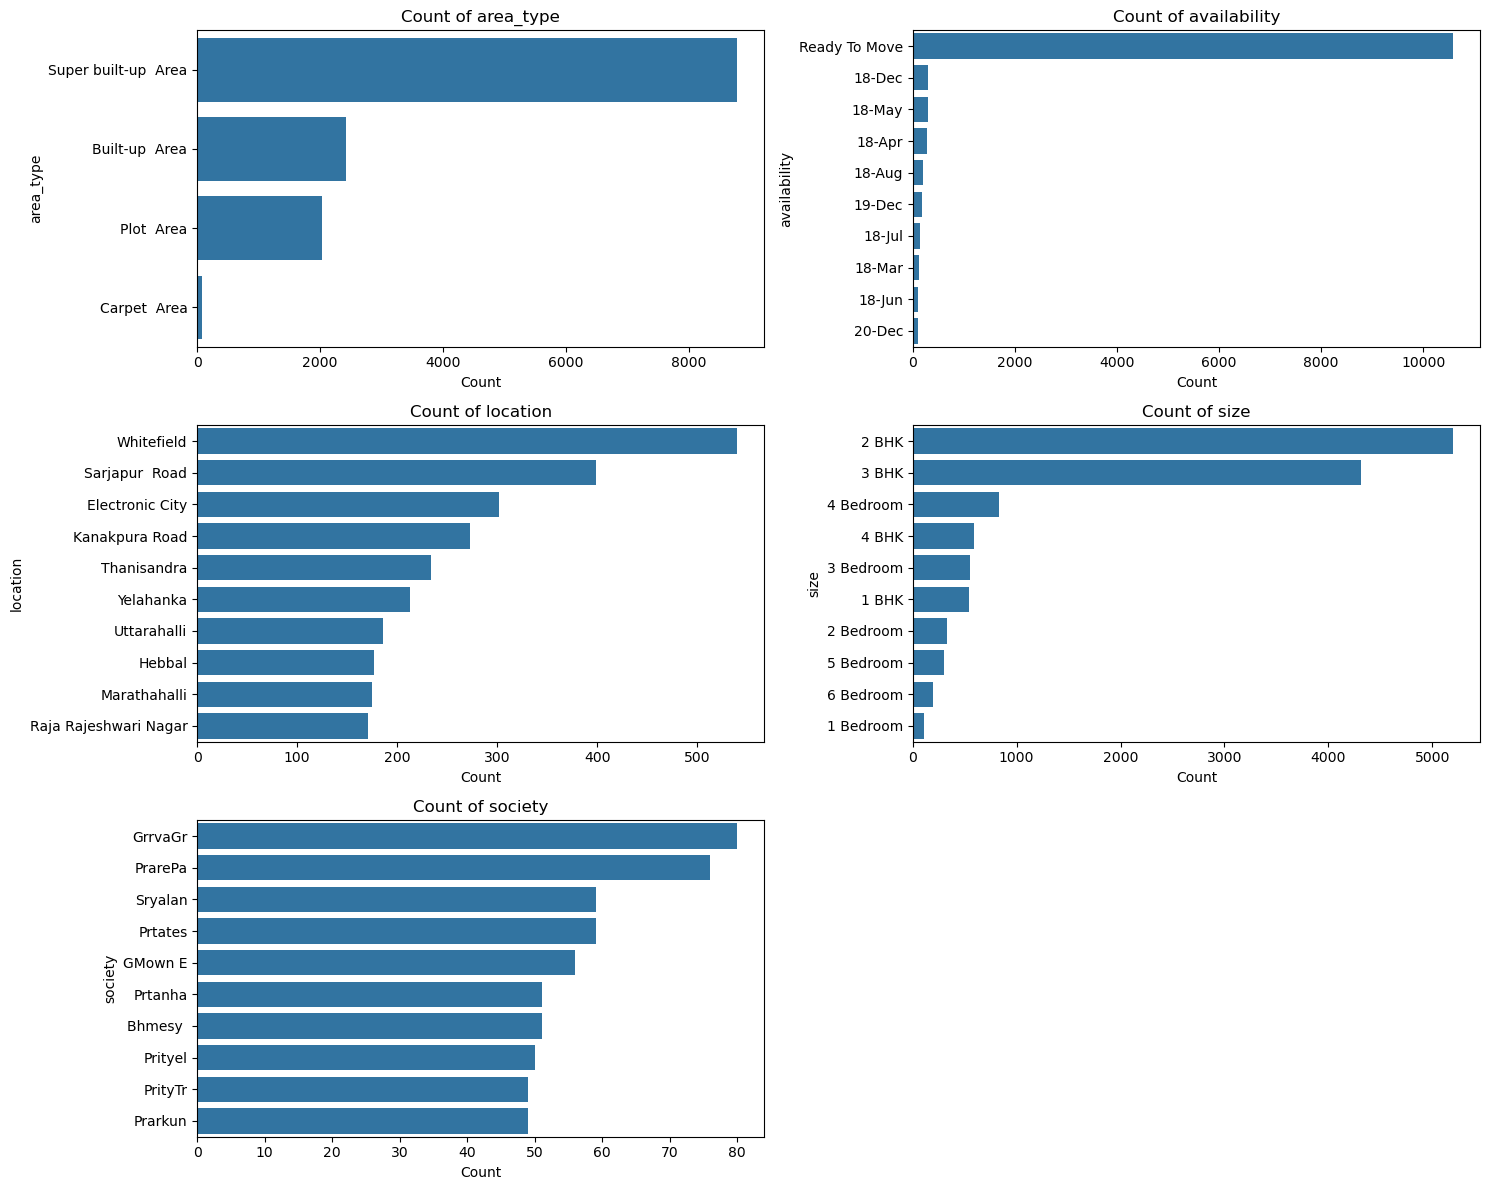

In [600]:


# Define proper categorical features (excluding numerical ones like 'total_sqft')
cat_features = ['area_type', 'availability', 'location', 'size', 'society']

# Adjust subplot layout
plt.figure(figsize=(15, 12))  # Larger figure for better spacing
rows = (len(cat_features) + 1) // 2  # Dynamic row calculation
cols = 2  # Two columns layout

for i, feature in enumerate(cat_features, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(y=df[feature], order=df[feature].value_counts().index[:10])  # Top 10 most common
    plt.title(f"Count of {feature}")
    plt.xlabel("Count")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


### Price Distribution by Area Type

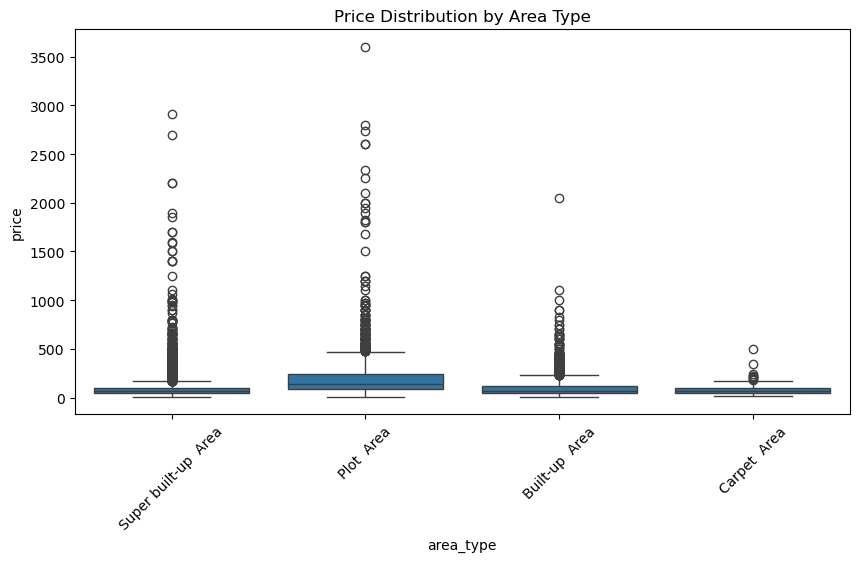

In [601]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='area_type', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Area Type")
plt.show()


### Relationship Between Total Sqmt and Price

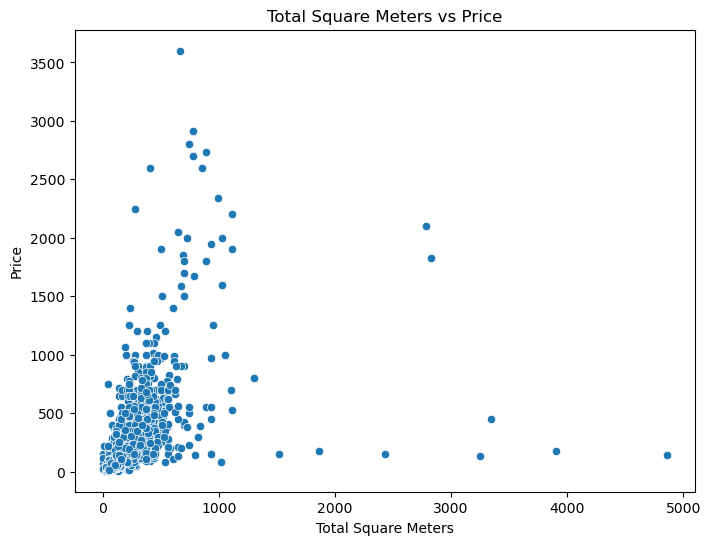

In [602]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['total_sqmt'], y=df['price'])
plt.title("Total Square Meters vs Price")
plt.xlabel("Total Square Meters")
plt.ylabel("Price")
plt.show()


### Bathroom Count vs. Price Analysis

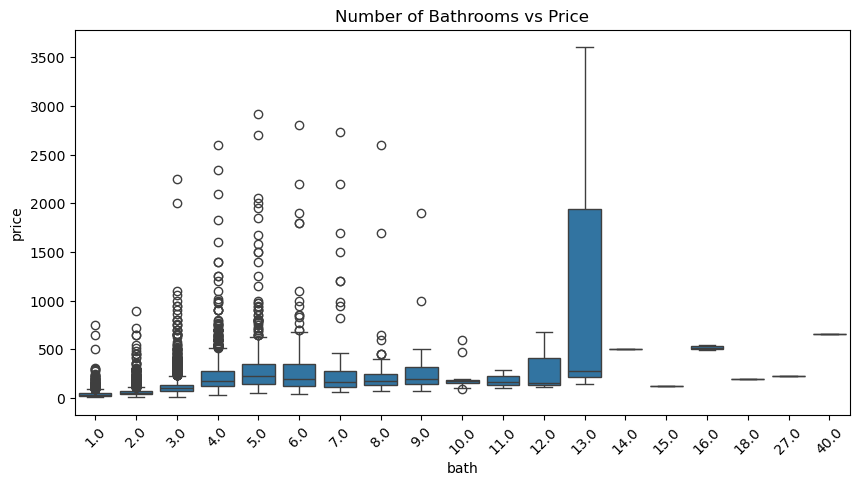

In [603]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='bath', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Number of Bathrooms vs Price")
plt.show()


### Number of Bedrooms vs Price

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Global Tech\AppData\Local\Temp\ipykernel_13216\3905663478.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['num_bedrooms'] = df['size'].str.extract('(\d+)').astype(float)


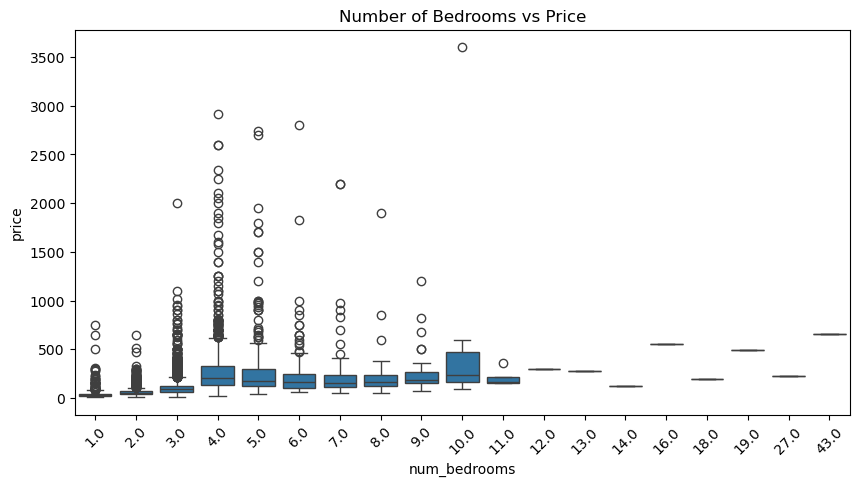

In [604]:
# Extract numerical values from 'size' column
df['num_bedrooms'] = df['size'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 5))
sns.boxplot(x='num_bedrooms', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Number of Bedrooms vs Price")
plt.show()


### etude numerique 

### verify the bhk vs bedroom 

In [605]:
df["size"].value_counts()


size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [606]:
df["is_bhk"] = df["size"].str.contains("BHK", na=False)
df["is_bedroom"] = df["size"].str.contains("Bedroom", na=False)
df["size_num"] = df["size"].str.extract("(\d+)").astype(float)

# Group by number of rooms and compare counts
df.groupby("size_num")[["is_bhk", "is_bedroom"]].sum()


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Global Tech\AppData\Local\Temp\ipykernel_13216\3924578509.py:3: SyntaxWarning: invalid escape sequence '\d'
  df["size_num"] = df["size"].str.extract("(\d+)").astype(float)


,is_bhk,is_bedroom
size_num,,
1.0,538,105
2.0,5199,329
3.0,4310,547
4.0,591,826
5.0,59,297
6.0,30,191
7.0,17,83
8.0,5,84
9.0,8,46


In [607]:
from scipy.stats import ttest_ind

bhk_prices = df[df["is_bhk"]]["price"]
bedroom_prices = df[df["is_bedroom"]]["price"]

t_stat, p_value = ttest_ind(bhk_prices, bedroom_prices, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -23.39315156702079, P-value: 1.3480839695451803e-110


In [608]:
# p<0.05 donc bh et bedrooms ont des distributios differentes

In [609]:
df['type'] = df['size'].apply(lambda x: 'BHK' if isinstance(x, str) and 'BHK' in x else 'Bedroom')

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,is_duplicate,total_sqmt,num_bedrooms,is_bhk,is_bedroom,size_num,type
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,False,98.105568,2.0,True,False,2.0,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,False,241.547800,4.0,False,True,4.0,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,False,133.780320,3.0,True,False,3.0,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,False,141.305463,3.0,True,False,3.0,BHK
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,False,111.483600,2.0,True,False,2.0,BHK


### comparing columns contribution to price changes

In [610]:
# Select only numerical columns
num_features = ['total_sqmt', 'bath', 'balcony',  'num_bedrooms' , "price"]

# Compute correlation matrix
corr_matrix = df[num_features].corr()

# Show correlation of features with price
corr_matrix['price'].sort_values(ascending=False)


price           1.000000
total_sqmt      0.575559
bath            0.456345
num_bedrooms    0.398292
balcony         0.120355
Name: price, dtype: float64

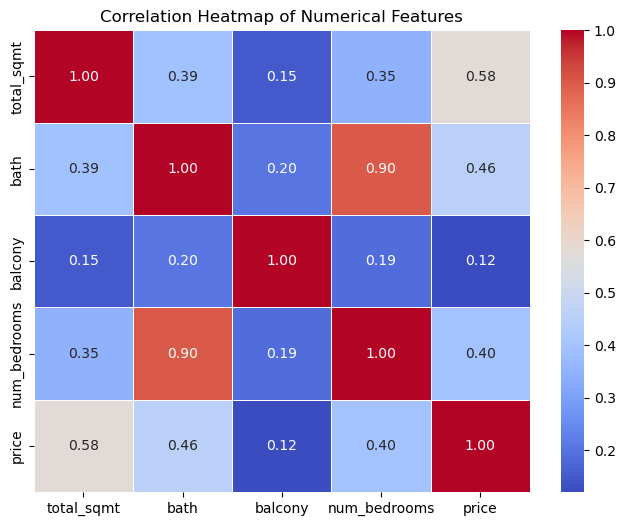

In [611]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [612]:
df.groupby("type")["price"].mean()
#contribution of bhk vs bedroom

type
BHK         91.064891
Bedroom    203.198718
Name: price, dtype: float64

## Data cleaning


In [613]:
df.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft        46
bath              73
balcony          609
price              0
is_duplicate       0
total_sqmt        46
num_bedrooms      16
is_bhk             0
is_bedroom         0
size_num          16
type               0
dtype: int64

In [614]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,is_duplicate,total_sqmt,num_bedrooms,is_bhk,is_bedroom,size_num,type
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,False,98.105568,2.0,True,False,2.0,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,False,241.547800,4.0,False,True,4.0,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,False,133.780320,3.0,True,False,3.0,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,False,141.305463,3.0,True,False,3.0,BHK
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,False,111.483600,2.0,True,False,2.0,BHK


In [615]:
# Drop rows where price or total_sqmt is missing
df = df.dropna(subset=['price', 'total_sqmt'])

# Fill missing numerical values with median (avoiding inplace warning)
df['bath'] = df['bath'].fillna(df['bath'].median())
df['balcony'].fillna(0, inplace=True)

df['size_num'] = df['size_num'].fillna(df['size_num'].median())
df['num_bedrooms'] = df['num_bedrooms'].fillna(df['num_bedrooms'].median())
# Drop 'society' if too many missing values
if df['society'].isnull().sum() / len(df) > 0.4:
    df = df.drop(columns=['society'])

# Recheck missing values
df.isnull().sum()


C:\Users\Global Tech\AppData\Local\Temp\ipykernel_13216\2033090000.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balcony'].fillna(0, inplace=True)


area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
is_duplicate     0
total_sqmt       0
num_bedrooms     0
is_bhk           0
is_bedroom       0
size_num         0
type             0
dtype: int64

In [616]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,is_duplicate,total_sqmt,num_bedrooms,is_bhk,is_bedroom,size_num,type
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,False,98.105568,2.0,True,False,2.0,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,False,241.547800,4.0,False,True,4.0,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,False,133.780320,3.0,True,False,3.0,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,False,141.305463,3.0,True,False,3.0,BHK
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,False,111.483600,2.0,True,False,2.0,BHK


In [617]:
df2= df[['area_type','availability','location',	'bath'	,'balcony'	,'price',	'total_sqmt','num_bedrooms','type']].copy()
df2.head()

,area_type,availability,location,bath,balcony,price,total_sqmt,num_bedrooms,type
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,98.105568,2.0,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,241.547800,4.0,Bedroom
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,133.780320,3.0,BHK
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,141.305463,3.0,BHK
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,111.483600,2.0,BHK


In [618]:
df2.columns

Index(['area_type', 'availability', 'location', 'bath', 'balcony', 'price',
       'total_sqmt', 'num_bedrooms', 'type'],
      dtype='object')

In [619]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13274 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13274 non-null  object 
 1   availability  13274 non-null  object 
 2   location      13273 non-null  object 
 3   bath          13274 non-null  float64
 4   balcony       13274 non-null  float64
 5   price         13274 non-null  float64
 6   total_sqmt    13274 non-null  float64
 7   num_bedrooms  13274 non-null  float64
 8   type          13274 non-null  object 
dtypes: float64(5), object(4)
memory usage: 1.0+ MB


In [620]:
df2.shape

(13274, 9)

In [621]:
# Trim spaces & lowercase location names
df2['location'] = df2['location'].str.strip().str.lower()

# Group locations with very few listings into "other"
location_counts = df2['location'].value_counts()
rare_locations = location_counts[location_counts < 10].index
df2['location'] = df2['location'].apply(lambda x: 'other' if x in rare_locations else x)


In [622]:
df2.head()

,area_type,availability,location,bath,balcony,price,total_sqmt,num_bedrooms,type
0,Super built-up Area,19-Dec,electronic city phase ii,2.0,1.0,39.07,98.105568,2.0,BHK
1,Plot Area,Ready To Move,chikka tirupathi,5.0,3.0,120.00,241.547800,4.0,Bedroom
2,Built-up Area,Ready To Move,uttarahalli,2.0,3.0,62.00,133.780320,3.0,BHK
3,Super built-up Area,Ready To Move,lingadheeranahalli,3.0,1.0,95.00,141.305463,3.0,BHK
4,Super built-up Area,Ready To Move,kothanur,2.0,1.0,51.00,111.483600,2.0,BHK


# feature Engineer

In [623]:
df3 = df2.copy()


In [624]:
df3['total_rooms'] = df3['num_bedrooms'] + df3['bath'] + df3['balcony']
df3.head()

,area_type,availability,location,bath,balcony,price,total_sqmt,num_bedrooms,type,total_rooms
0,Super built-up Area,19-Dec,electronic city phase ii,2.0,1.0,39.07,98.105568,2.0,BHK,5.0
1,Plot Area,Ready To Move,chikka tirupathi,5.0,3.0,120.00,241.547800,4.0,Bedroom,12.0
2,Built-up Area,Ready To Move,uttarahalli,2.0,3.0,62.00,133.780320,3.0,BHK,8.0
3,Super built-up Area,Ready To Move,lingadheeranahalli,3.0,1.0,95.00,141.305463,3.0,BHK,7.0
4,Super built-up Area,Ready To Move,kothanur,2.0,1.0,51.00,111.483600,2.0,BHK,5.0


## populairite de locatlisation

In [625]:
location_counts = df3['location'].value_counts()
df3['location_density'] = df3['location'].map(location_counts)
df3.head()

,area_type,availability,location,bath,balcony,price,total_sqmt,num_bedrooms,type,total_rooms,location_density
0,Super built-up Area,19-Dec,electronic city phase ii,2.0,1.0,39.07,98.105568,2.0,BHK,5.0,132.0
1,Plot Area,Ready To Move,chikka tirupathi,5.0,3.0,120.00,241.547800,4.0,Bedroom,12.0,17.0
2,Built-up Area,Ready To Move,uttarahalli,2.0,3.0,62.00,133.780320,3.0,BHK,8.0,186.0
3,Super built-up Area,Ready To Move,lingadheeranahalli,3.0,1.0,95.00,141.305463,3.0,BHK,7.0,23.0
4,Super built-up Area,Ready To Move,kothanur,2.0,1.0,51.00,111.483600,2.0,BHK,5.0,66.0


In [626]:
df3['area_type'] = df3['area_type'].map({
    'Super built-up  Area': 3,
    'Built-up  Area': 2,
    'Plot  Area': 1,
    'Carpet  Area': 0
})


In [627]:
df3['rooms_per_sqm'] = df3['total_rooms'] / df3['total_sqmt']


In [628]:
df3.info()
df3.head()


<class 'pandas.core.frame.DataFrame'>
Index: 13274 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         13274 non-null  int64  
 1   availability      13274 non-null  object 
 2   location          13273 non-null  object 
 3   bath              13274 non-null  float64
 4   balcony           13274 non-null  float64
 5   price             13274 non-null  float64
 6   total_sqmt        13274 non-null  float64
 7   num_bedrooms      13274 non-null  float64
 8   type              13274 non-null  object 
 9   total_rooms       13274 non-null  float64
 10  location_density  13273 non-null  float64
 11  rooms_per_sqm     13274 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 1.3+ MB


,area_type,availability,location,bath,balcony,price,total_sqmt,num_bedrooms,type,total_rooms,location_density,rooms_per_sqm
0,3,19-Dec,electronic city phase ii,2.0,1.0,39.07,98.105568,2.0,BHK,5.0,132.0,0.050966
1,1,Ready To Move,chikka tirupathi,5.0,3.0,120.00,241.547800,4.0,Bedroom,12.0,17.0,0.049680
2,2,Ready To Move,uttarahalli,2.0,3.0,62.00,133.780320,3.0,BHK,8.0,186.0,0.059800
3,3,Ready To Move,lingadheeranahalli,3.0,1.0,95.00,141.305463,3.0,BHK,7.0,23.0,0.049538
4,3,Ready To Move,kothanur,2.0,1.0,51.00,111.483600,2.0,BHK,5.0,66.0,0.044850


In [629]:
df4 =df3.copy()
df4.head()

,area_type,availability,location,bath,balcony,price,total_sqmt,num_bedrooms,type,total_rooms,location_density,rooms_per_sqm
0,3,19-Dec,electronic city phase ii,2.0,1.0,39.07,98.105568,2.0,BHK,5.0,132.0,0.050966
1,1,Ready To Move,chikka tirupathi,5.0,3.0,120.00,241.547800,4.0,Bedroom,12.0,17.0,0.049680
2,2,Ready To Move,uttarahalli,2.0,3.0,62.00,133.780320,3.0,BHK,8.0,186.0,0.059800
3,3,Ready To Move,lingadheeranahalli,3.0,1.0,95.00,141.305463,3.0,BHK,7.0,23.0,0.049538
4,3,Ready To Move,kothanur,2.0,1.0,51.00,111.483600,2.0,BHK,5.0,66.0,0.044850


In [630]:
df4.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [631]:
def convert_availability(value):
    if value in ["Ready To Move", "Immediate Possession"]:
        return 2  # Best availability
    else:
        return 1  # Future possession date

df4["availability_numeric"] = df4["availability"].apply(convert_availability)

df4[["availability", "availability_numeric"]].head(10)  # Preview changes
df4.head()

,area_type,availability,location,bath,balcony,price,total_sqmt,num_bedrooms,type,total_rooms,location_density,rooms_per_sqm,availability_numeric
0,3,19-Dec,electronic city phase ii,2.0,1.0,39.07,98.105568,2.0,BHK,5.0,132.0,0.050966,1
1,1,Ready To Move,chikka tirupathi,5.0,3.0,120.00,241.547800,4.0,Bedroom,12.0,17.0,0.049680,2
2,2,Ready To Move,uttarahalli,2.0,3.0,62.00,133.780320,3.0,BHK,8.0,186.0,0.059800,2
3,3,Ready To Move,lingadheeranahalli,3.0,1.0,95.00,141.305463,3.0,BHK,7.0,23.0,0.049538,2
4,3,Ready To Move,kothanur,2.0,1.0,51.00,111.483600,2.0,BHK,5.0,66.0,0.044850,2


In [632]:
df4 = df4.drop("location",axis=1)

In [633]:
df4.area_type.unique()

array([3, 1, 2, 0], dtype=int64)

In [634]:
df4 =df4.drop("availability",axis =1)
df4.head()

,area_type,bath,balcony,price,total_sqmt,num_bedrooms,type,total_rooms,location_density,rooms_per_sqm,availability_numeric
0,3,2.0,1.0,39.07,98.105568,2.0,BHK,5.0,132.0,0.050966,1
1,1,5.0,3.0,120.00,241.547800,4.0,Bedroom,12.0,17.0,0.049680,2
2,2,2.0,3.0,62.00,133.780320,3.0,BHK,8.0,186.0,0.059800,2
3,3,3.0,1.0,95.00,141.305463,3.0,BHK,7.0,23.0,0.049538,2
4,3,2.0,1.0,51.00,111.483600,2.0,BHK,5.0,66.0,0.044850,2


In [635]:
df4['is_bhk'] = (df['type'] == 'BHK').astype(int)
df4['bhk_bedroom_interaction'] = df4['num_bedrooms'] * df4['is_bhk']

df4.head()

,area_type,bath,balcony,price,total_sqmt,num_bedrooms,type,total_rooms,location_density,rooms_per_sqm,availability_numeric,is_bhk,bhk_bedroom_interaction
0,3,2.0,1.0,39.07,98.105568,2.0,BHK,5.0,132.0,0.050966,1,1,2.0
1,1,5.0,3.0,120.00,241.547800,4.0,Bedroom,12.0,17.0,0.049680,2,0,0.0
2,2,2.0,3.0,62.00,133.780320,3.0,BHK,8.0,186.0,0.059800,2,1,3.0
3,3,3.0,1.0,95.00,141.305463,3.0,BHK,7.0,23.0,0.049538,2,1,3.0
4,3,2.0,1.0,51.00,111.483600,2.0,BHK,5.0,66.0,0.044850,2,1,2.0


In [636]:
df4.shape

(13274, 13)

In [637]:
df4.drop(["type"],axis="columns")
df4.head()

,area_type,bath,balcony,price,total_sqmt,num_bedrooms,type,total_rooms,location_density,rooms_per_sqm,availability_numeric,is_bhk,bhk_bedroom_interaction
0,3,2.0,1.0,39.07,98.105568,2.0,BHK,5.0,132.0,0.050966,1,1,2.0
1,1,5.0,3.0,120.00,241.547800,4.0,Bedroom,12.0,17.0,0.049680,2,0,0.0
2,2,2.0,3.0,62.00,133.780320,3.0,BHK,8.0,186.0,0.059800,2,1,3.0
3,3,3.0,1.0,95.00,141.305463,3.0,BHK,7.0,23.0,0.049538,2,1,3.0
4,3,2.0,1.0,51.00,111.483600,2.0,BHK,5.0,66.0,0.044850,2,1,2.0


In [638]:
df4.columns

Index(['area_type', 'bath', 'balcony', 'price', 'total_sqmt', 'num_bedrooms',
       'type', 'total_rooms', 'location_density', 'rooms_per_sqm',
       'availability_numeric', 'is_bhk', 'bhk_bedroom_interaction'],
      dtype='object')

In [639]:
df4 = df4[['area_type', 'bath', 'balcony', 'price', 'total_sqmt', 'num_bedrooms',
       'total_rooms', 'location_density', 'rooms_per_sqm',
       'availability_numeric', 'is_bhk', 'bhk_bedroom_interaction']]

# outliers 

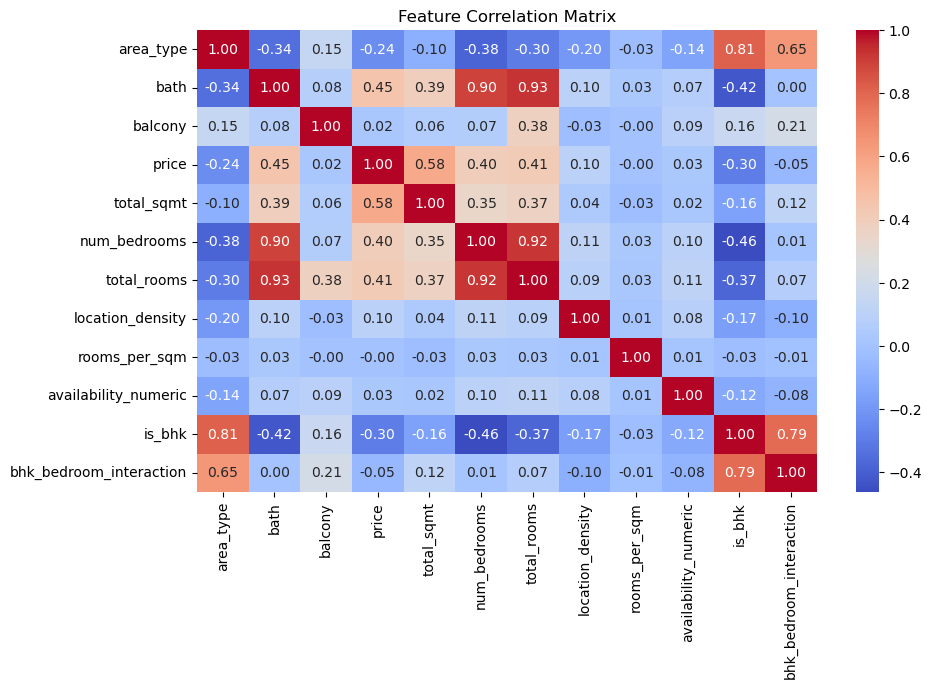

In [640]:

# Compute correlation
corr_matrix = df4.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [641]:
correlation_threshold = 0.37
correlated_features = df4.corr()['price'].abs().sort_values(ascending=False)
important_features = correlated_features[correlated_features >= correlation_threshold].index
print("Features strongly correlated with price:", list(important_features))


Features strongly correlated with price: ['price', 'total_sqmt', 'bath', 'total_rooms', 'num_bedrooms']


In [642]:
df5 = df4[ [ 'total_sqmt', 'bath', 'total_rooms', 'num_bedrooms','price']]

In [643]:
df5.head()

,total_sqmt,bath,total_rooms,num_bedrooms,price
0,98.105568,2.0,5.0,2.0,39.07
1,241.547800,5.0,12.0,4.0,120.00
2,133.780320,2.0,8.0,3.0,62.00
3,141.305463,3.0,7.0,3.0,95.00
4,111.483600,2.0,5.0,2.0,51.00


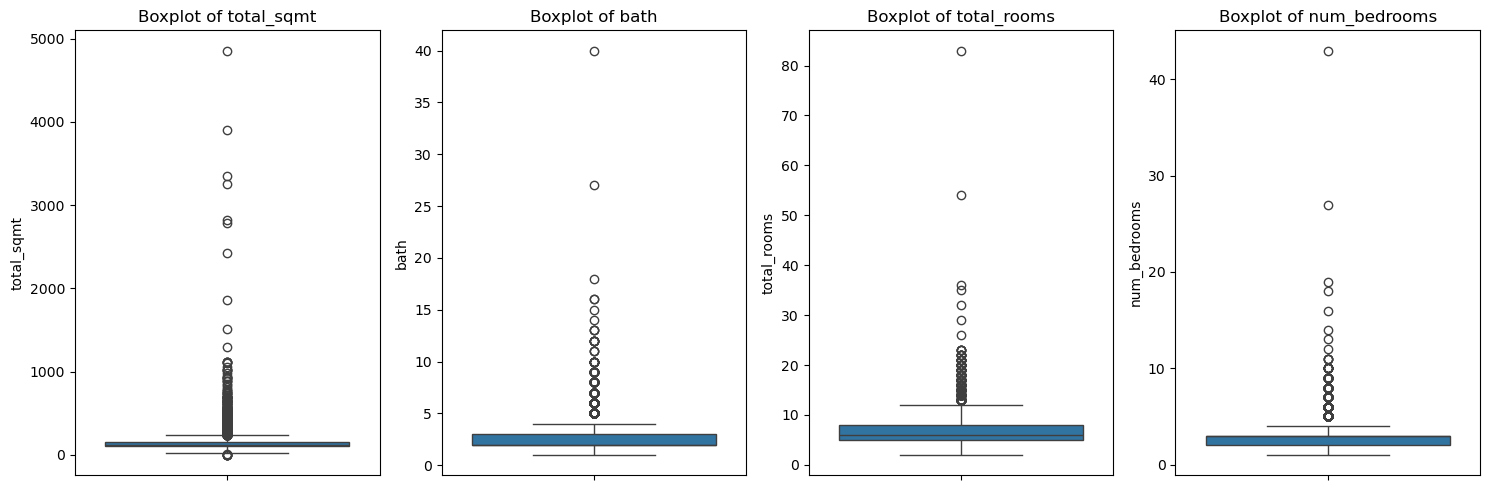

In [644]:

features_to_check = ['total_sqmt', 'bath', 'total_rooms', 'num_bedrooms']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(1, len(features_to_check), i)
    sns.boxplot(y=df5[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()


In [645]:
df6= df5.copy()

In [646]:
df6.shape

(13274, 5)

### test the models with outliers removed

In [647]:
def remove_outliers_iqr(df6, column):
    Q1 = df6[column].quantile(0.25)
    Q3 = df6[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df6[(df6[column] >= lower_bound) & (df6[column] <= upper_bound)]

# Apply IQR method on selected features
for col in features_to_check:
    df6 = remove_outliers_iqr(df6, col)
df6.head()

,total_sqmt,bath,total_rooms,num_bedrooms,price
0,98.105568,2.0,5.0,2.0,39.07
2,133.780320,2.0,8.0,3.0,62.00
3,141.305463,3.0,7.0,3.0,95.00
4,111.483600,2.0,5.0,2.0,51.00
5,108.696510,2.0,5.0,2.0,38.00


In [648]:
df6.shape

(11393, 5)

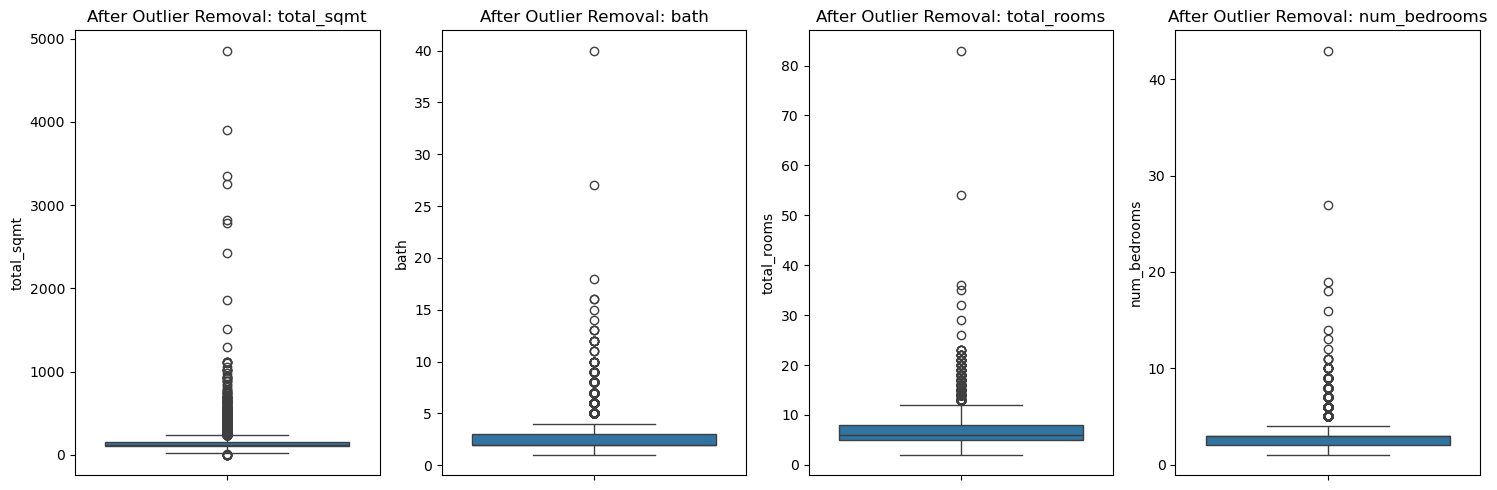

In [649]:

features_to_check = ['total_sqmt', 'bath', 'total_rooms', 'num_bedrooms']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(1, len(features_to_check), i)
    sns.boxplot(y=df5[feature])
    plt.title(f"After Outlier Removal: {feature}")
plt.tight_layout()
plt.show()


# model selection

In [650]:
df7 = df6.copy()

In [651]:
from sklearn.model_selection import train_test_split

# Define independent variables (features) and dependent variable (target)
X = df7.drop(columns=['price'])  # Drop the target column
y = df7['price']  # Target variable

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [652]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}")


Linear Regression - MAE: 24.698633484264338, MSE: 1747.672066492859, R²: 0.3956893949914646


In [653]:
# decidin tree


from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - MAE: {mae_dt}, MSE: {mse_dt}, R²: {r2_dt}")


Decision Tree - MAE: 23.540396868191657, MSE: 2487.393293739565, R²: 0.1399083529152051


In [654]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")


Random Forest - MAE: 22.342739657031128, MSE: 1956.3492662110204, R²: 0.3235329262631911


In [655]:
import pandas as pd

# Store results
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_scores = [mae_lr, mae_dt, mae_rf]
mse_scores = [mse_lr, mse_dt, mse_rf]
r2_scores = [r2_lr, r2_dt, r2_rf]

# Create DataFrame
comparison_df = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'R² Score': r2_scores
})

# Sort by best R² score
print(comparison_df.sort_values(by='R² Score', ascending=False))


               Model        MAE          MSE  R² Score
0  Linear Regression  24.698633  1747.672066  0.395689
2      Random Forest  22.342740  1956.349266  0.323533
1      Decision Tree  23.540397  2487.393294  0.139908


### do it without outlier removal

In [656]:
df8 = df5.copy()
df8.head()

,total_sqmt,bath,total_rooms,num_bedrooms,price
0,98.105568,2.0,5.0,2.0,39.07
1,241.547800,5.0,12.0,4.0,120.00
2,133.780320,2.0,8.0,3.0,62.00
3,141.305463,3.0,7.0,3.0,95.00
4,111.483600,2.0,5.0,2.0,51.00


In [657]:
df8.isna().sum()

total_sqmt      0
bath            0
total_rooms     0
num_bedrooms    0
price           0
dtype: int64

In [658]:
df8.columns

Index(['total_sqmt', 'bath', 'total_rooms', 'num_bedrooms', 'price'], dtype='object')

In [659]:
X = df8[['total_sqmt', 'bath', 'total_rooms', 'num_bedrooms']]
y = df8['price']

In [660]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [661]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}")

MAE: 46.55732969161492, RMSE: 128.9098732734818, R²: 0.45246947878371646


In [662]:
# decidin tree


from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - MAE: {mae_dt}, MSE: {mse_dt}, R²: {r2_dt}")


Decision Tree - MAE: 42.293488975447225, MSE: 20540.56489722058, R²: 0.32321869500387934


In [663]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")


Random Forest - MAE: 41.06689016518781, MSE: 15553.005731209569, R²: 0.48755141019493264


In [664]:
import pandas as pd

# Store results
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_scores = [mae_lr, mae_dt, mae_rf]
mse_scores = [mse_lr, mse_dt, mse_rf]
r2_scores = [r2_lr, r2_dt, r2_rf]

# Create DataFrame
comparison_df = pd.DataFrame({
    'Model': models,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'R² Score': r2_scores
})

# Sort by best R² score
print(comparison_df.sort_values(by='R² Score', ascending=False))


               Model        MAE           MSE  R² Score
2      Random Forest  41.066890  15553.005731  0.487551
0  Linear Regression  24.698633   1747.672066  0.395689
1      Decision Tree  42.293489  20540.564897  0.323219
